# discrétisation avec k-means clustering

Dans la discrétisation utilisant le clustering à k-means, les intervalles sont les clusters identifiés par l'algorithme K-means. Le nombre de clusters (k) est défini par l'utilisateur. L'algorithme de clustering k-means comporte deux étapes principales. Dans l'étape d'initialisation, k observations sont choisies au hasard comme centres initiaux des k clusters, et les points de données restants sont affectés au cluster le plus proche. Dans l'étape d'itération, les centres des clusters sont recalculés comme les points moyens de toutes les observations au sein du cluster, et les observations sont réaffectées au cluster le plus proche nouvellement créé. L'étape d'itération continue jusqu'à ce que les centres k optimaux soient trouvés. Dans cette recette, nous allons effectuer une discrétisation K-means avec scikit-learn, en utilisant l'ensemble de données Boston House Prices

Commençons par importer les bibliothèques Python nécessaires et préparons l'ensemble de données :

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Les clusters optimaux de k-means doivent être déterminés à l'aide de l'ensemble d'apprentissage, divisons donc les données en ensembles d'apprentissage et de test


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

Créons un discrétiseur qui utilise le clustering k-means pour créer 10 intervalles en définissant la stratégie sur kmeans :

In [5]:
# set up a k-means discretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

# fit the discretizer to the train set so that it learns the 
# interval boundaries
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [6]:
# we can inspect the bin boundaries here:

disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.03266667, 15.46755102,
       18.89709647, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
       36.98      ]),
       array([ 1.1742    ,  2.26301884,  3.30153104,  4.48057886,  5.60712611,
        6.6482802 ,  7.56131797,  8.45406587,  9.7820881 , 11.37686667,
       12.1265    ]),
       array([3.561     , 3.987125  , 4.73948864, 5.32155682, 5.77285276,
       6.14207435, 6.503811  , 6.91447956, 7.43717157, 8.1095049 ,
       8.78      ])], dtype=object)

In [7]:
# let's transform the train set, remember that it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

print(train_t.head())

   LSTAT  DIS   RM
0    9.0  0.0  2.0
1    1.0  2.0  6.0
2    4.0  0.0  5.0
3    0.0  6.0  5.0
4    4.0  0.0  4.0


In [8]:
# let's do the same for the test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

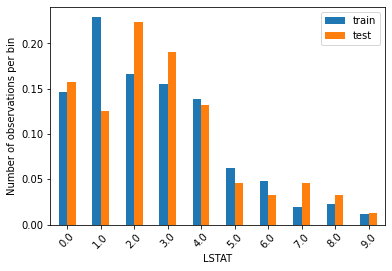

In [9]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

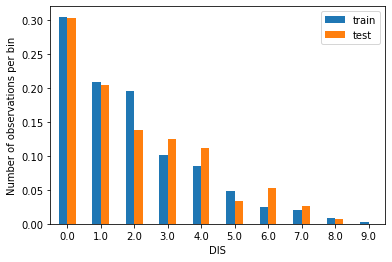

In [10]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

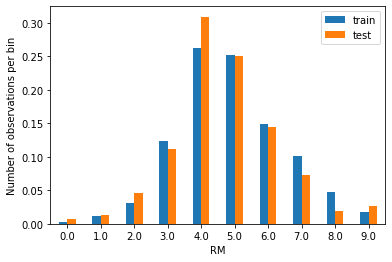

In [11]:

# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Pour effectuer la discrétisation k-means, nous avons utilisé KBinsDiscretizer() de scikit-learn, en définissant la stratégie sur kmeans et le nombre de clusters sur 10 dans l'argument n_bins. Avec la méthode fit(), le transformateur a appris les limites du cluster en utilisant le k-means algorithme. Avec la méthode transform(), le discrétiseur a trié les valeurs de la variable dans leur cluster correspondant, renvoyant un tableau NumPy avec les variables discrétisées, que nous avons converties en un dataframe